 # 2019-2020 Ladies 1500 Meter Results
 Dataset includes personal best for every skater in the 2019-2020 season for 1500 m.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
results = pd.read_csv('ladies-1500-2019-2020.csv')
results.head(5)

,rank,name,age,country,time,track,date
0,1,Miho Takagi,LSA,JPN,"1.50,33",Calgary (CAN),2/8/2020
1,2,Ireen Wüst,L30,NED,"1.50,92",Salt Lake City (USA),2/16/2020
2,3,Evgeniia Lalenkova,LSA,RUS,"1.51,13",Salt Lake City (USA),2/16/2020
3,4,Elizaveta Kazelina,LN4,RUS,"1.51,41",Salt Lake City (USA),2/16/2020
4,5,Ivanie Blondin,L30,CAN,"1.51,76",Calgary (CAN),2/8/2020


In [3]:
# Drop Null Values
results = results.dropna()

In [4]:
results['time']= results['time'].str.replace(',', '').astype(float)
results

,rank,name,age,country,time,track,date
0,1,Miho Takagi,LSA,JPN,1.5033,Calgary (CAN),2/8/2020
1,2,Ireen Wüst,L30,NED,1.5092,Salt Lake City (USA),2/16/2020
2,3,Evgeniia Lalenkova,LSA,RUS,1.5113,Salt Lake City (USA),2/16/2020
3,4,Elizaveta Kazelina,LN4,RUS,1.5141,Salt Lake City (USA),2/16/2020
4,5,Ivanie Blondin,L30,CAN,1.5176,Calgary (CAN),2/8/2020
...,...,...,...,...,...,...,...
3312,3313,Ronja Siren Hagen,LYB,NOR,4.4151,Geithus (NOR),2/5/2020
3313,3314,Eevi Koivupuisto,LYF,FIN,4.5549,Seinäjoki (FIN),3/7/2020
3314,3315,Viktoria Tuulas,L50,EST,5.0873,Tallinn (EST),3/7/2020
3315,3316,Angelika Hotvedt,LYB,NOR,5.2509,Geithus (NOR),2/5/2020


In [5]:
# Check stats for time
results['time'].describe()

count    3317.000000
mean        2.363873
std         0.377915
min         1.503300
25%         2.154200
50%         2.278900
75%         2.435800
max         5.294500
Name: time, dtype: float64

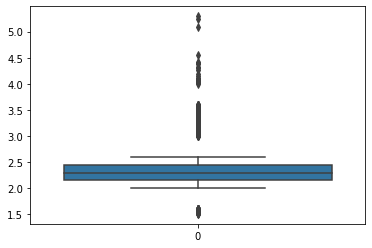

In [7]:
# Plot Stats for Time
sns.boxplot(data=results['time'])

In [ ]:
results.groupby('age').count()

# Which Countries have the most speedskaters?

In [6]:
# Groupby Country
country_counts= results.groupby('country').count().reset_index()
# Just selected needed columns
country_counts= country_counts[['country','rank']].copy()
# Rename column
country_counts.columns = ['Country','Count']
country_counts.tail()
# ascending order
country_counts.sort_values(by=['Count'])

# Now just Display countries over 5 skaters
country_counts = country_counts[country_counts['Count']>10]
country_counts.dtypes

Country    object
Count       int64
dtype: object

# Visulize Country Count 
Countires with more then 10 skaters

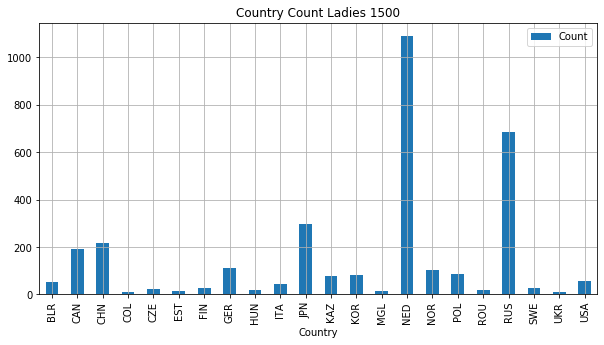

In [7]:
# Use Pandas Plot.
ax = country_counts.plot.bar(x='Country',y='Count',figsize=(10,5),grid=True,title='Country Count Ladies 1500')

# Age Divsions

In [10]:
# Groupby Age
age = results.groupby('age').count().reset_index()
# Just select needed column
age = age[['age','rank']].copy()
#Rename columns
age.columns=[['age','count']]
# age.drop.iloc[11] TODO delete unknown age
age.dtypes
age = age[1:3]
age

,age,count
1,L35,37
2,L40,34


# Plot by Age Divsion

In [ ]:
ax = age.plot.bar(x='age',y='count')#,figsize=(10,5),grid=True,title='Age Divsions')
ax
#TODO FIX

# By Track

In [40]:
# Groupby Track
track = results.groupby('track').count().reset_index()
track= track[track['rank']>20]

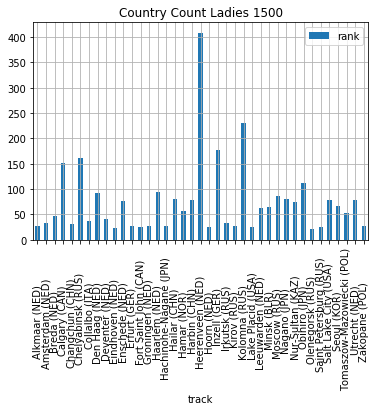

In [41]:
ax = track.plot.bar(x="track", y="rank",grid=True,title='Country Count Ladies 1500')